<a href="https://colab.research.google.com/github/mkesari-data/ml/blob/0219_version/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
# prompt: can you import csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/datasets/classification/decisiontree/titanic.csv'

import pandas as pd
df = pd.read_csv(filename)

## Basic Analysis

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Preprocessing



**1.   Eearlier We removed missing values records. **

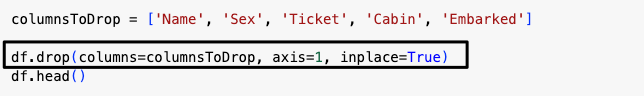

2.   Removed Categorical Data

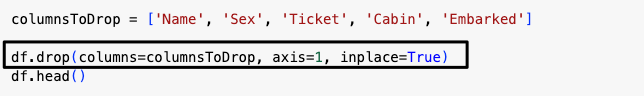

Did you realize how much valueable information we missed

<Axes: >

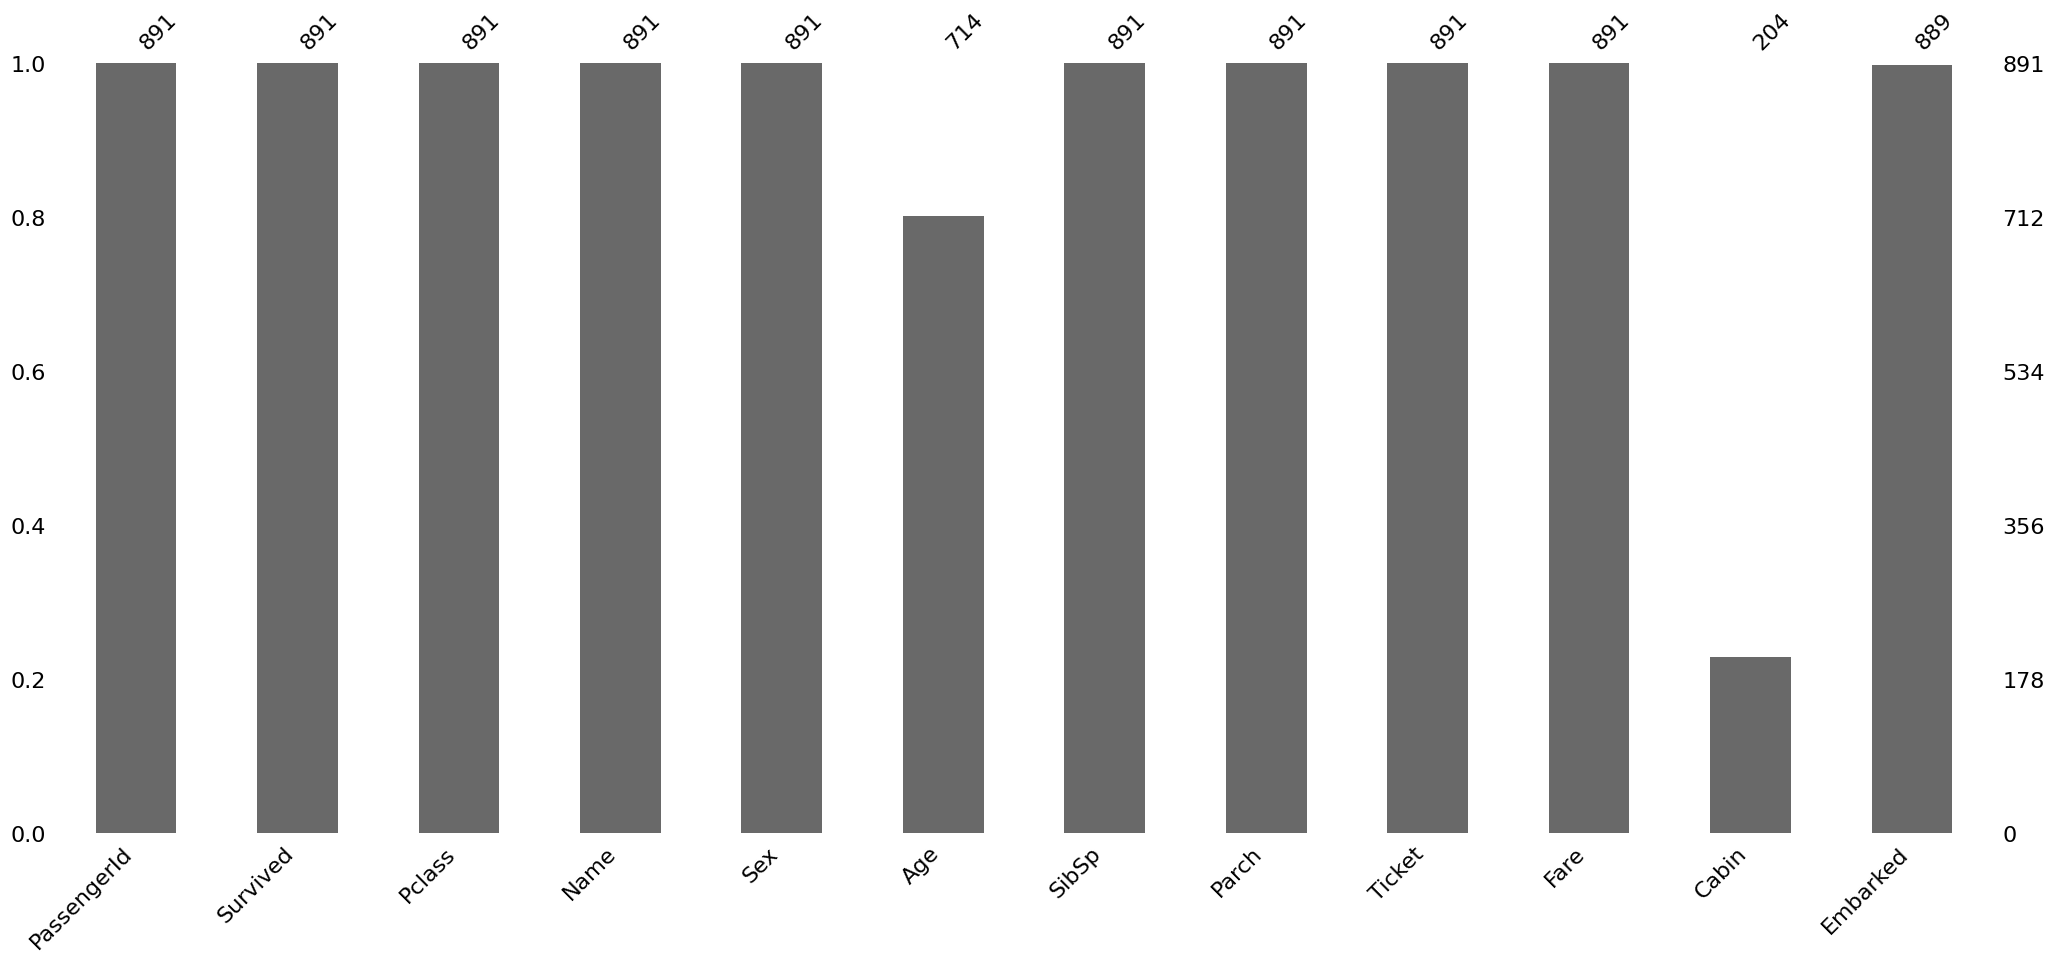

In [ ]:
# prompt: using missingno library and do dataprofiling of my df dataset

import missingno as msno
# Do data profiling using missingno
msno.bar(df)

<Axes: >

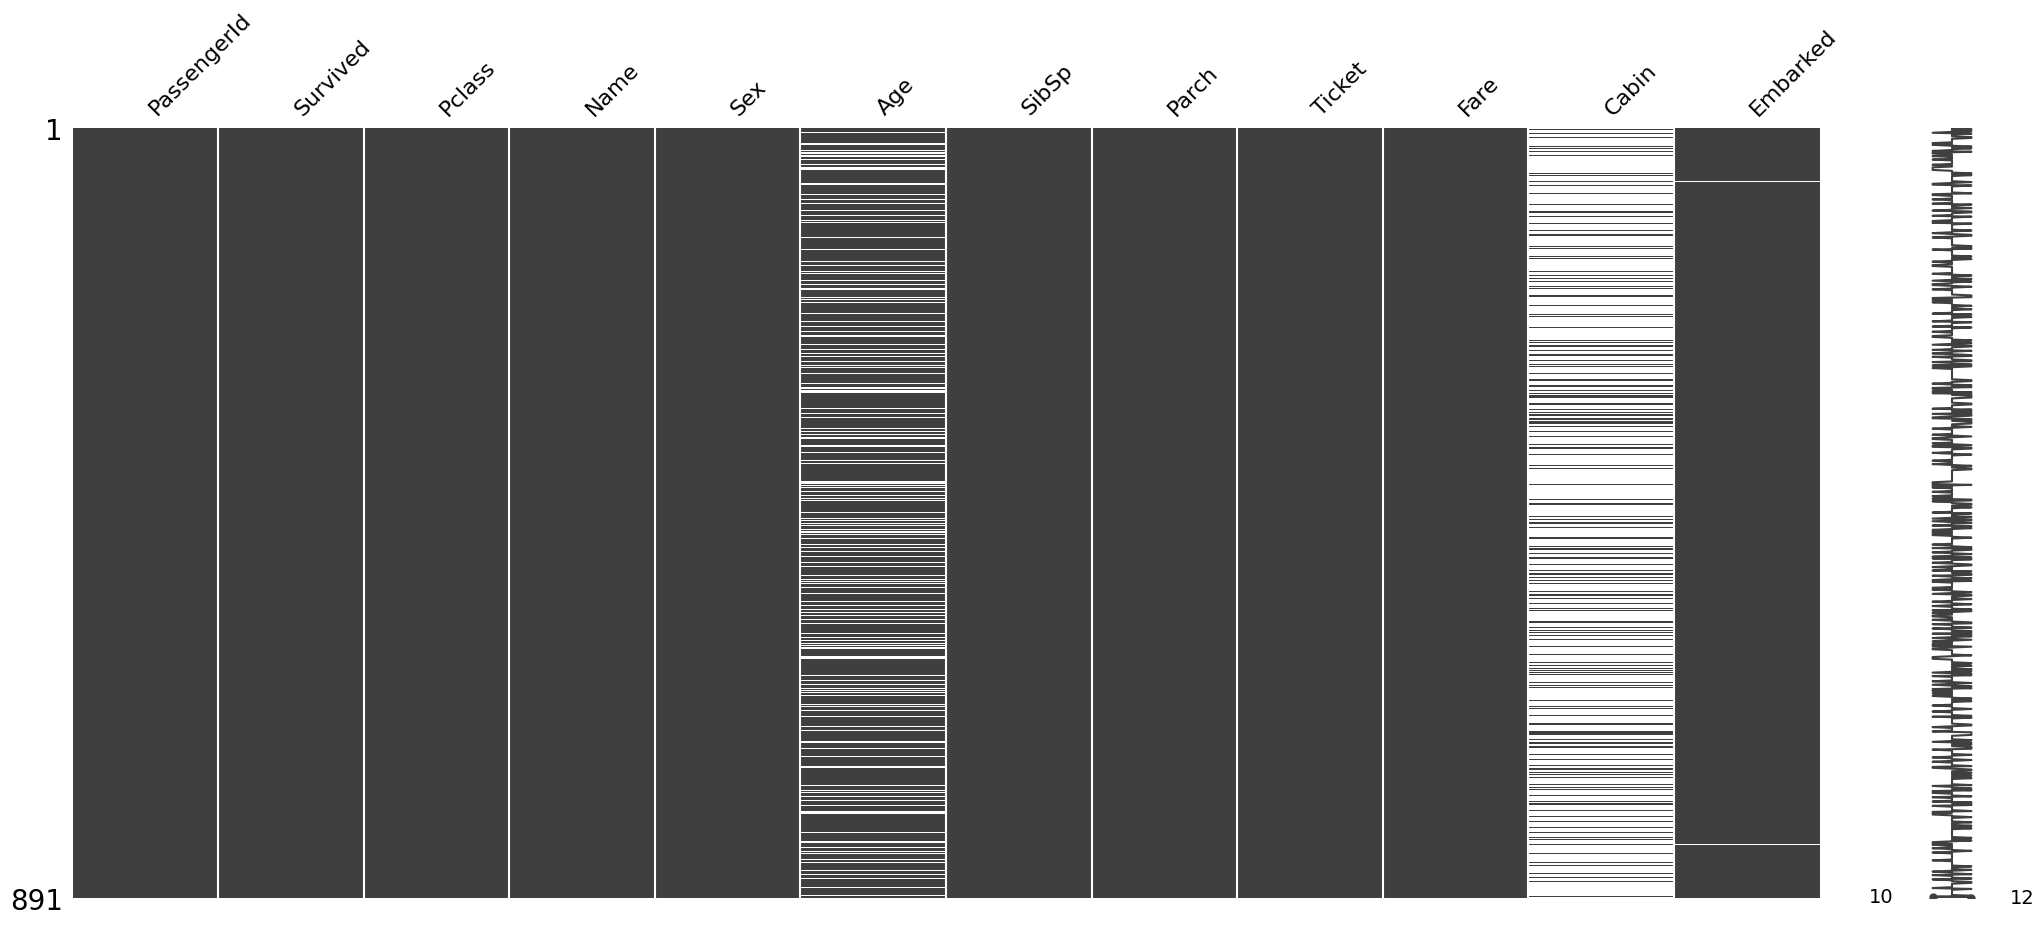

In [ ]:
msno.matrix(df)

### refill missing numerical Values.

In [ ]:
df.fillna(method='bfill' , inplace=True)
#df.fillna(method='bfill' , inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Treate Cateogrical Data.

In [ ]:
categoricalColumns = ['Name' ,'Sex' ,'Ticket' ,'Cabin' ,  'Embarked'  ]
df_encoded = pd.get_dummies(df , columns= categoricalColumns)
df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.shape

(891, 1731)

In [ ]:
# Drop few unncessary categorical columns like Name Ticket etc.
drop_columns = ['Name' , 'Ticket' , 'Cabin']
df.drop(drop_columns , axis =1 , inplace=True)

In [ ]:
categoricalColumns = ['Sex' , 'Embarked'  ]
df_encoded = pd.get_dummies(df , columns= categoricalColumns)
df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df_encoded.shape

(891, 12)

# GridSearchCV

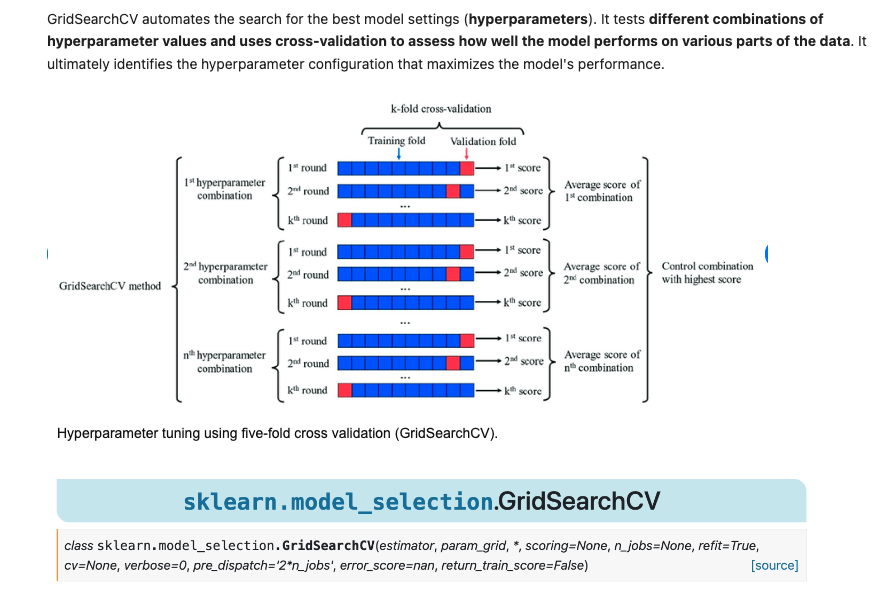

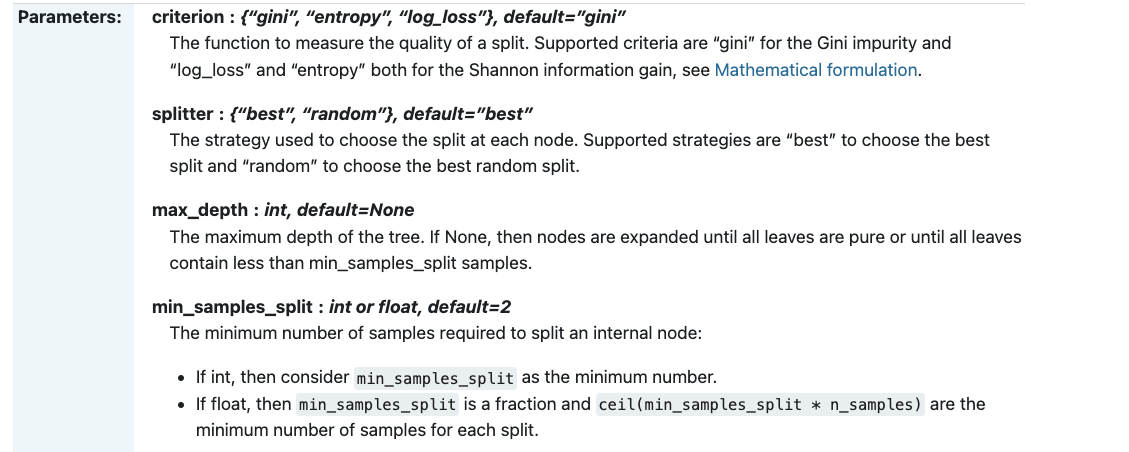

In [ ]:
# Divide your data as Input Dataframe and Oputput.
X = df_encoded.drop('Survived' , axis=1)
y = df_encoded['Survived']

In [ ]:
# Write GridSearchCV Implementation